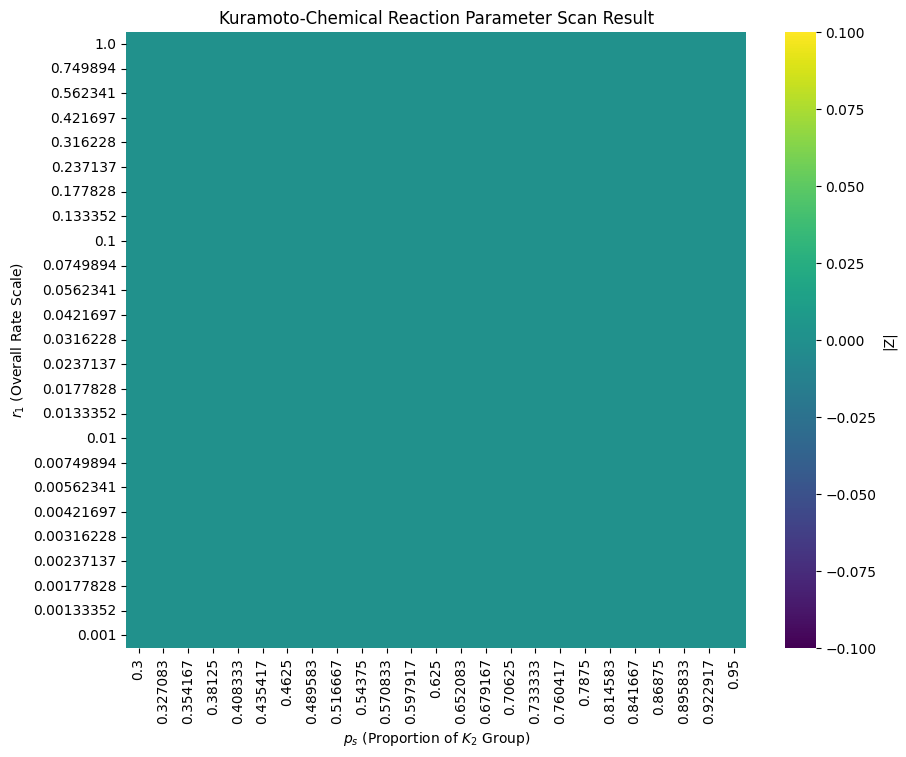

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 读取数据
file = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_test/scan_R_total.csv'
file_r1 = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_test/scan_R_K1.csv'
file_r2 = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_test/scan_R_K2.csv'
# 修改您的读取代码：
df = pd.read_csv(file, index_col=0)
df_r1 = pd.read_csv(file_r1, index_col=0) # K1 群体 (负耦合)
df_r2 = pd.read_csv(file_r2, index_col=0) # K2 群体 (正耦合)

# 2. 数据准备
# 列名 (X轴的 p_s 值) 默认是字符串，建议转换为浮点数
df.columns = df.columns.astype(float)

# 3. 绘制热图 (Heatmap)
plt.figure(figsize=(10, 8))

# .iloc[::-1] 用于反转行顺序。
# 这样可以确保 Y 轴（rate_scale）从图表底部向上递增，符合常规习惯。
sns.heatmap(
    df.iloc[::-1],
    cmap='viridis',            # 选择色图 (例如：'viridis', 'magma', 'jet')
    annot=False,               # 如果需要显示网格上的数值，请设为 True
    linewidths=0,            # 网格线宽度 (可选)
    cbar_kws={'label': '|Z|'} # 颜色条标签
)

# 4. 设置标签和标题
plt.xlabel('$p_s$ (Proportion of $K_2$ Group)')
plt.ylabel('$r_1$ (Overall Rate Scale)')
plt.title('Kuramoto-Chemical Reaction Parameter Scan Result')
plt.show()

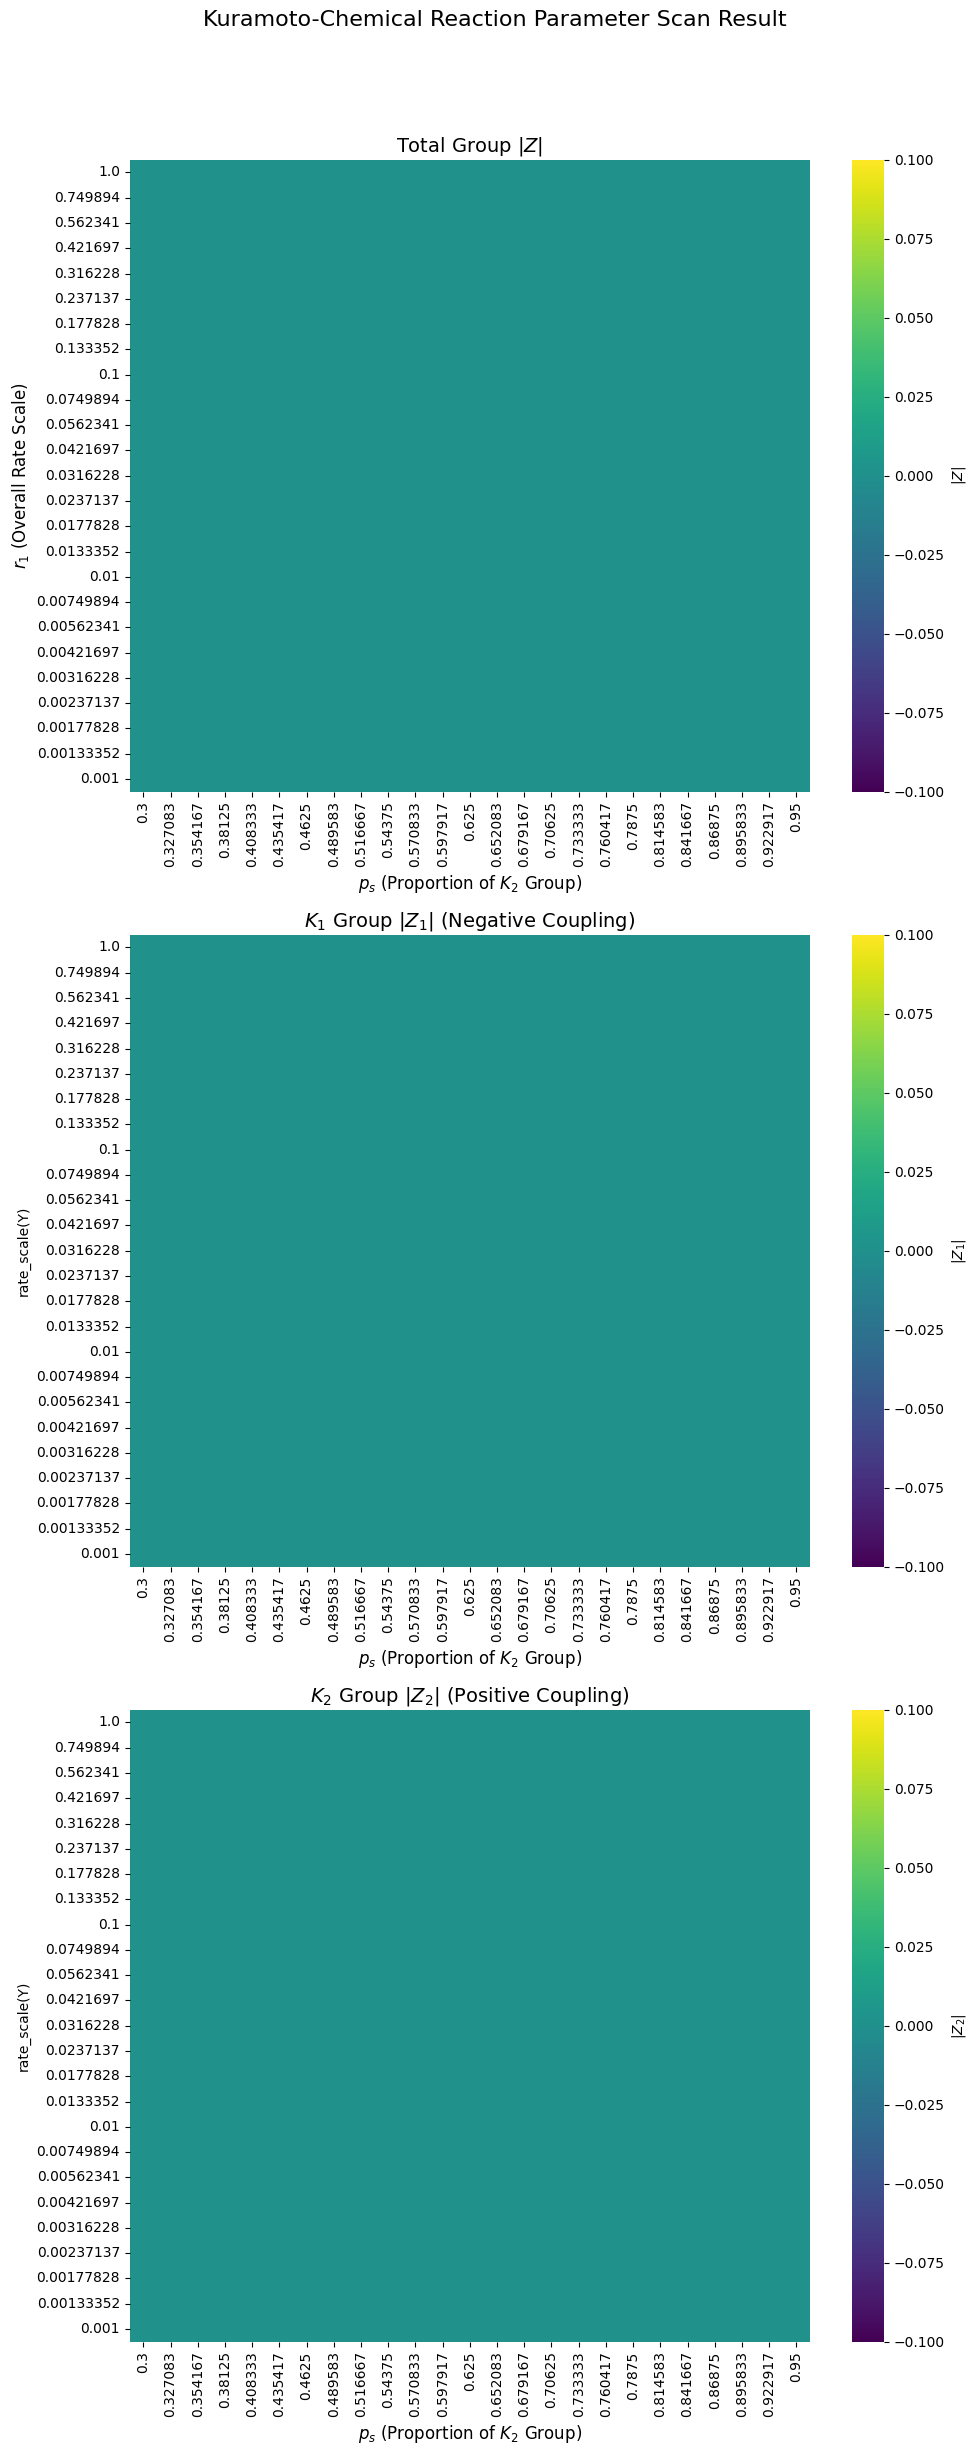

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 读取数据
file = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_test/scan_R_total.csv'
file_r1 = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_test/scan_R_K1.csv'
file_r2 = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_test/scan_R_K2.csv'

df_total = pd.read_csv(file, index_col=0)      # 总体 |Z|
df_r1 = pd.read_csv(file_r1, index_col=0)      # K1 群体 |Z_1| (负耦合)
df_r2 = pd.read_csv(file_r2, index_col=0)      # K2 群体 |Z_2| (正耦合)

# 2. 数据准备
# 将所有数据框的列名（X轴的 p_s 值）转换为浮点数
def prepare_df(data_frame):
    data_frame.columns = data_frame.columns.astype(float)
    # 反转行顺序，使 Y 轴（rate_scale）从底部向上递增
    return data_frame.iloc[::-1]

df_total = prepare_df(df_total)
df_r1 = prepare_df(df_r1)
df_r2 = prepare_df(df_r2)

# 将数据框和对应的标题、颜色条标签放入一个列表中，方便循环绘制
heatmap_data = [
    (df_total, 'Total Group $|Z|$', '$|Z|$'),
    (df_r1, '$K_1$ Group $|Z_1|$ (Negative Coupling)', '$|Z_1|$'),
    (df_r2, '$K_2$ Group $|Z_2|$ (Positive Coupling)', '$|Z_2|$')
]

# 3. 绘制三个热图 (Heatmap)
# 创建一个包含 1 行 3 列子图的图形，并设置图形大小
fig, axes = plt.subplots(3, 1, figsize=(10, 25), sharey=False) # sharey=True 共享 Y 轴

# 设置总体标题
fig.suptitle('Kuramoto-Chemical Reaction Parameter Scan Result', fontsize=16)

# 循环绘制每个热图
for i, (df, title, cbar_label) in enumerate(heatmap_data):
    ax = axes[i] # 获取当前子图

    # 绘制热图
    sns.heatmap(
        df,
        ax=ax,                     # 指定当前子图
        cmap='viridis',            # 选择色图
        annot=False,               # 不显示网格上的数值
        linewidths=0,              # 网格线宽度
        cbar_kws={'label': cbar_label} # 颜色条标签
    )

    # 设置标签和标题
    ax.set_xlabel('$p_s$ (Proportion of $K_2$ Group)', fontsize=12)
    ax.set_title(title, fontsize=14)

# 只有第一个子图需要 Y 轴标签
axes[0].set_ylabel('$r_1$ (Overall Rate Scale)', fontsize=12)

# 调整子图之间的间距
plt.tight_layout(rect=[0, 0, 1, 0.95]) # 调整以给 fig.suptitle 留出空间
plt.show()